# Name - Aman Jain (11912021)

# -------------------------------------------------------------------------

## Importing the required libraries
Requests  - The requests module allows you to send HTTP requests using Python. <br>
Numpy - Numpy is used for scientific computing <br>
Pandas - Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool <br>
BeautifulSoup - It is used for pulling data out of HTML and XML files.<br>
Matplotlib - Matplotlib is a plotting library <br>
Seaborn - Seaborn is a Python data visualization library based on matplotlib

In [1]:
import requests 
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Web Scraping
### Downloading data using requests and BeautifulSoup modules

In [2]:
# download data 

link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pubhtml"
req = requests.get(link)
soup = BeautifulSoup(req.content, "html.parser")

In [3]:
tbody = soup.find_all('tbody')[0]
body = tbody.find_all('tr')


In [4]:
head_row = [i.text for i in body[0].find_all('td')]

In [5]:
contents = []

for i in range(len(body)):
    contents.append([i.text for i in body[i].find_all('td')])

### Saving to Dataframe


In [6]:
p_df = pd.DataFrame(contents[2:len(contents)], columns=head_row)
p_df.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,...,Source_2,Source_3,Backup Notes,,,,,,,
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,,,,,,,,None
1,2,KL-AL-P1,02/02/2020,,,Alappuzha,Alappuzha,Kerala,KL,Recovered,...,https://weather.com/en-IN/india/news/news/2020...,,Student from Wuhan,,,,,,,
2,3,KL-KS-P1,03/02/2020,,,Kasaragod,Kasaragod,Kerala,KL,Recovered,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,,,,,,,
3,4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,...,https://economictimes.indiatimes.com/news/poli...,,Travel history to Italy and Austria,,,,,,,
4,5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",,,,,,,


## Data cleaning and transformations

In [7]:
# shape of Dataframe

p_df.shape

(15062, 26)

In [8]:
# columns

p_df.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'State code', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', '', '', '', '', '', '', ''],
      dtype='object')

In [9]:
# selecting important columns only

p_df = p_df.loc[:, :'Backup Notes']

In [10]:
# no. of empty strings in each column

print(p_df.shape)
for i in p_df.columns:
    print(i, '\t', p_df[p_df[i]==''].shape[0])

(15062, 19)
Patient Number 	 323
State Patient Number 	 12791
Date Announced 	 384
Age Bracket 	 13453
Gender 	 12239
Detected City 	 13389
Detected District 	 2630
Detected State 	 386
State code 	 386
Current Status 	 384
Notes 	 1710
Contracted from which Patient (Suspected) 	 13559
Nationality 	 13763
Type of transmission 	 12119
Status Change Date 	 495
Source_1 	 616
Source_2 	 11751
Source_3 	 14617
Backup Notes 	 14702


In [11]:
# replacing empty strings with np.nan

print(p_df.shape)

p_df = p_df.replace(r'', np.nan, regex=True)
p_df.isna().sum()

(15062, 19)


Patient Number                                 323
State Patient Number                         12791
Date Announced                                 384
Age Bracket                                  13453
Gender                                       12239
Detected City                                13389
Detected District                             2630
Detected State                                 386
State code                                     386
Current Status                                 384
Notes                                         1710
Contracted from which Patient (Suspected)    13559
Nationality                                  13763
Type of transmission                         12119
Status Change Date                             495
Source_1                                       616
Source_2                                     11751
Source_3                                     14617
Backup Notes                                 14702
dtype: int64

In [12]:
# droping empty rows (row with just row number but without patient entry

p_df.dropna(subset=['Detected State'], inplace=True)
print(p_df.shape)
p_df.isna().sum()

(14676, 19)


Patient Number                                   0
State Patient Number                         12405
Date Announced                                   0
Age Bracket                                  13068
Gender                                       11854
Detected City                                13003
Detected District                             2245
Detected State                                   0
State code                                       0
Current Status                                   0
Notes                                         1325
Contracted from which Patient (Suspected)    13173
Nationality                                  13378
Type of transmission                         11734
Status Change Date                             110
Source_1                                       232
Source_2                                     11366
Source_3                                     14232
Backup Notes                                 14316
dtype: int64

In [13]:
p_df.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'State code', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [14]:
# rename dateframe columns 

p_df.columns = ['_'.join(col.lower().split()) for col in p_df.columns]
p_df.rename(columns = {'contracted_from_which_patient_(suspected)':'suspected_contacted_patient'}, inplace=True)
p_df.sample(5)

,patient_number,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,notes,suspected_contacted_patient,nationality,type_of_transmission,status_change_date,source_1,source_2,source_3,backup_notes
12579,12580,KA-P297,16/04/2020,43,M,Raibagh,Belagavi,Karnataka,KA,Hospitalized,Travelled from Delhi (Repeat Test),E0,NaN,NaN,16/04/2020,NaN,NaN,NaN,NaN
5983,5984,NaN,09/04/2020,10,M,NaN,Siwan,Bihar,BR,Hospitalized,"Contact with Oman Return, Same family",P5937,India,Local,09/04/2020,https://twitter.com/sanjayjavin/status/1248122...,NaN,NaN,NaN
4427,4428,NaN,06/04/2020,NaN,NaN,NaN,NaN,Delhi,DL,Hospitalized,Travelled to Delhi,E0,NaN,Local,06/04/2020,https://twitter.com/ANI/status/124713335687931...,NaN,NaN,NaN
12826,12827,NaN,16/04/2020,NaN,NaN,NaN,Indore,Madhya Pradesh,MP,Hospitalized,Details awaited,NaN,NaN,NaN,16/04/2020,https://twitter.com/ANI/status/125075338589422...,NaN,NaN,NaN
11087,11088,NaN,14/04/2020,NaN,NaN,NaN,Indore,Madhya Pradesh,MP,Hospitalized,Details awaited,NaN,NaN,NaN,14/04/2020,https://twitter.com/JansamparkMP/status/125007...,NaN,NaN,NaN


In [15]:
# creating patient id column from patient number

p_df['p_id'] = p_df['patient_number'].apply(lambda x : 'P'+str(x))
p_df.columns

Index(['patient_number', 'state_patient_number', 'date_announced',
       'age_bracket', 'gender', 'detected_city', 'detected_district',
       'detected_state', 'state_code', 'current_status', 'notes',
       'suspected_contacted_patient', 'nationality', 'type_of_transmission',
       'status_change_date', 'source_1', 'source_2', 'source_3',
       'backup_notes', 'p_id'],
      dtype='object')

In [16]:
p_df = p_df.loc[:, :'backup_notes']

### saving the cleaned data into 'patients.csv'

In [17]:
p_df.to_csv('patients.csv', index=False)

In [18]:
# Importing the datasets (this dataset still includes a lot of null values)

patients_before = pd.read_csv("patients.csv")

In [19]:
patients_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 19 columns):
patient_number                 14676 non-null int64
state_patient_number           2271 non-null object
date_announced                 14676 non-null object
age_bracket                    1608 non-null object
gender                         2822 non-null object
detected_city                  1673 non-null object
detected_district              12431 non-null object
detected_state                 14676 non-null object
state_code                     14676 non-null object
current_status                 14676 non-null object
notes                          13351 non-null object
suspected_contacted_patient    1503 non-null object
nationality                    1298 non-null object
type_of_transmission           2942 non-null object
status_change_date             14566 non-null object
source_1                       14444 non-null object
source_2                       3310 non-null object

In [20]:
patients_before.shape

(14676, 19)

In [21]:
patients_before.head(5)

,patient_number,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,notes,suspected_contacted_patient,nationality,type_of_transmission,status_change_date,source_1,source_2,source_3,backup_notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN
1,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [22]:
# Total Number of NA values in dataset

patients_before.isna().sum()

patient_number                     0
state_patient_number           12405
date_announced                     0
age_bracket                    13068
gender                         11854
detected_city                  13003
detected_district               2245
detected_state                     0
state_code                         0
current_status                     0
notes                           1325
suspected_contacted_patient    13173
nationality                    13378
type_of_transmission           11734
status_change_date               110
source_1                         232
source_2                       11366
source_3                       14232
backup_notes                   14316
dtype: int64

In [23]:
patients_before.current_status.value_counts()

Hospitalized    14475
Recovered         167
Deceased           33
Migrated            1
Name: current_status, dtype: int64

In [24]:
patients_before.head()

,patient_number,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,notes,suspected_contacted_patient,nationality,type_of_transmission,status_change_date,source_1,source_2,source_3,backup_notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN
1,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [25]:
# Creating a new dataframe with the required Columns

patients = patients_before[["date_announced","age_bracket","gender","detected_state","state_code","current_status","nationality"]]

In [26]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 7 columns):
date_announced    14676 non-null object
age_bracket       1608 non-null object
gender            2822 non-null object
detected_state    14676 non-null object
state_code        14676 non-null object
current_status    14676 non-null object
nationality       1298 non-null object
dtypes: object(7)
memory usage: 802.7+ KB


In [27]:
patients['age_bracket'].unique()

array(['20', nan, '45', '24', '69', '55', '70', '16', '27', '59', '65',
       '75', '54', '53', '61', '25', '63', '46', '3', '48', '40', '47',
       '13', '96', '89', '85', '68', '26', '76', '33', '37', '43', '21',
       '32', '42', '44', '51', '31', '29', '67', '49', '52', '22', '18',
       '34', '28', '56', '35', '50', '30', '38', '23', '19', '58', '41',
       '2', '60', '74', '39', '17', '36', '57', '64', '81', '62', '9',
       '7', '66', '12', '1', '14', '11', '6', '73', '28-35', '92', '72',
       '15', '77', '10', '80', '71', '78', '90', '4', '8', '5', '1.5'],
      dtype=object)

In [28]:
# Separate dataframes for Data Visualization

patients_ = patients[['gender','age_bracket','detected_state']]
patients_2 = patients[['age_bracket','detected_state']]
patients_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 3 columns):
gender            2822 non-null object
age_bracket       1608 non-null object
detected_state    14676 non-null object
dtypes: object(3)
memory usage: 344.1+ KB


In [29]:
# Total number of NA values count in each column

patients_.isna().sum()

gender            11854
age_bracket       13068
detected_state        0
dtype: int64

In [30]:
# Removing all the rows with NA values

patients_.dropna(inplace=True)

In [31]:
# Incorrect Data Found!

patients_['age_bracket'][(patients_['age_bracket'] == '28-35') | (patients_['age_bracket'] == '1.5')]

924      28-35
925      28-35
926      28-35
927      28-35
12590      1.5
Name: age_bracket, dtype: object

##### As we can see age column contains data with different types of data, we need to clean it using the apply function
which will be done using the user defined change_age( ) function

In [32]:
def change_age(age):
    if age == "28-35":
        return 32
    elif age == "1.5":
        return 2
    else:
        return age


In [33]:
# We also need to change age_bracket column of our patients_ dataframe

patients_2['age_bracket'] = patients_2['age_bracket'].apply(change_age)
patients_['age_bracket'] = patients_['age_bracket'].apply(change_age)

In [34]:
# Checking for type of age_bracket column of our dataset

type(patients_['age_bracket'][0])

str

In [35]:
#Conversion of string datatype to integer for all the rows of age_bracket column

patients_['age_bracket'] = patients_['age_bracket'].apply(int)
patients_2['age_bracket'] = patients_2['age_bracket'].apply(change_age)
type(patients_['age_bracket'][0])

numpy.int64

##### As we need to visualize our data, let's create one more column in our dataset(Age Group) for better visualization, with the theory

ages below 1 : "Infants" <br>
    ages in between(1 and 13) : "Children" <br>
    ages in between(13 and 18) : "Teens" <br>
    ages is between(18 and 65) : "Adults" <br>
    ages above 65 : "Elderly"
    
###### For that we need to define a function age_group and apply that to our dataset 

In [36]:
def age_group(age):
    if age<1:
        return "Infants"
    elif age>1 and age<13:
        return "Children"
    elif age>=13 and age<18:
        return "Teens"
    elif age>=18 and age<65:
        return "Adults"
    else:
        return "Elderly"

patients_['age_group'] = patients_['age_bracket'].apply(age_group)

In [37]:
patients_.head()

,gender,age_bracket,detected_state,age_group
0,F,20,Kerala,Adults
3,M,45,Delhi,Adults
4,M,24,Telangana,Adults
5,M,69,Rajasthan,Elderly
20,F,70,Rajasthan,Elderly


In [38]:
def random_value_for_age(age):
    if age == "will_be_changed":
        return np.random.randint(10,80)
    else:
        return age

In [39]:
# fill the Nan values of age_bracket with random value between 10 - 80 as we know more cases are in this range

patients_2['age_bracket'] = patients_2['age_bracket'].fillna("will_be_changed")
patients_2['age_bracket'] = patients_2['age_bracket'].apply(random_value_for_age)
patients_2['age_bracket'] = patients_2['age_bracket'].apply(int)


# Add a age group column in age_ageGroup dataset using the above function
patients_2['age_group'] = patients_2['age_bracket'].apply(age_group)

In [40]:
patients_2.head(10)

,age_bracket,detected_state,age_group
0,20,Kerala,Adults
1,13,Kerala,Teens
2,70,Kerala,Elderly
3,45,Delhi,Adults
4,24,Telangana,Adults
5,69,Rajasthan,Elderly
6,55,Haryana,Adults
7,55,Haryana,Adults
8,55,Haryana,Adults
9,55,Haryana,Adults


# Data Visualization

##### Seaborn Styling

In [41]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1)
sns.set_palette("bright")

### Plotting CountPlot on gender data 
<b>CountPlot : </b>It simply shows the number of occurrences of an item based on a certain type of category.

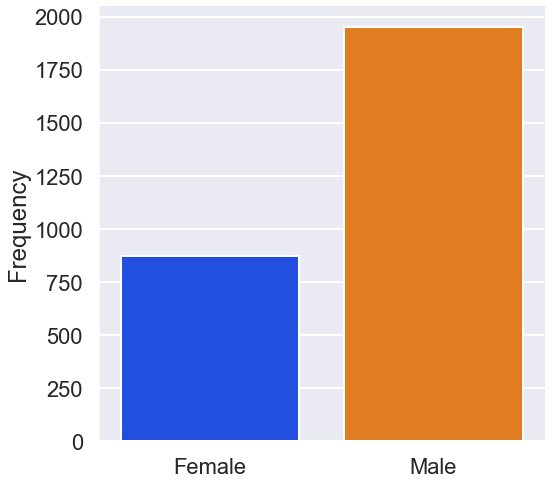

In [42]:
#Creating separate series for gender data
gender = patients['gender']


plt.figure(figsize=(8,8))
g1 = sns.countplot(gender)
g1.set(xticklabels= ["Female","Male"])
g1.set(xlabel = "",ylabel = "Frequency")
sns.despine()

### Plotting CountPlot on Age group data using the hue parameter set to Gender column

[Text(0, 0.5, ''), Text(0.5, 0, 'Frequency')]

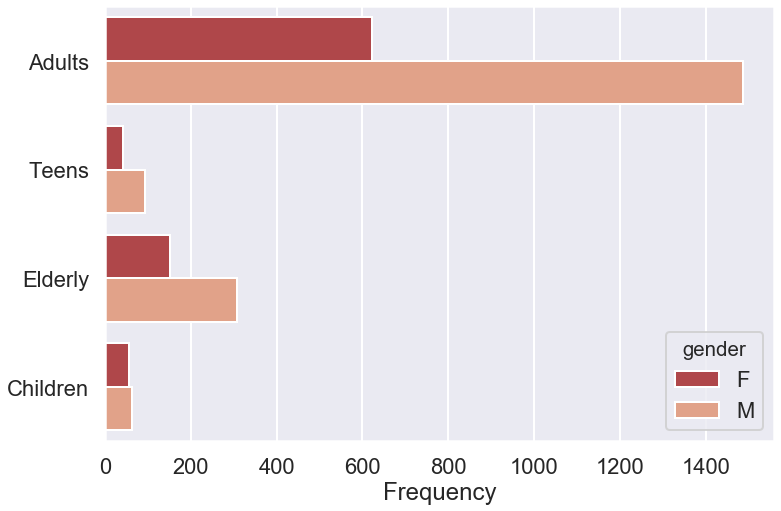

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
g2 = sns.countplot(y = patients_2.age_group, hue=patients.gender, palette=sns.color_palette("RdBu"))
g2.set(ylabel = "",xlabel = "Frequency")

### Plotting CountPlot on State data

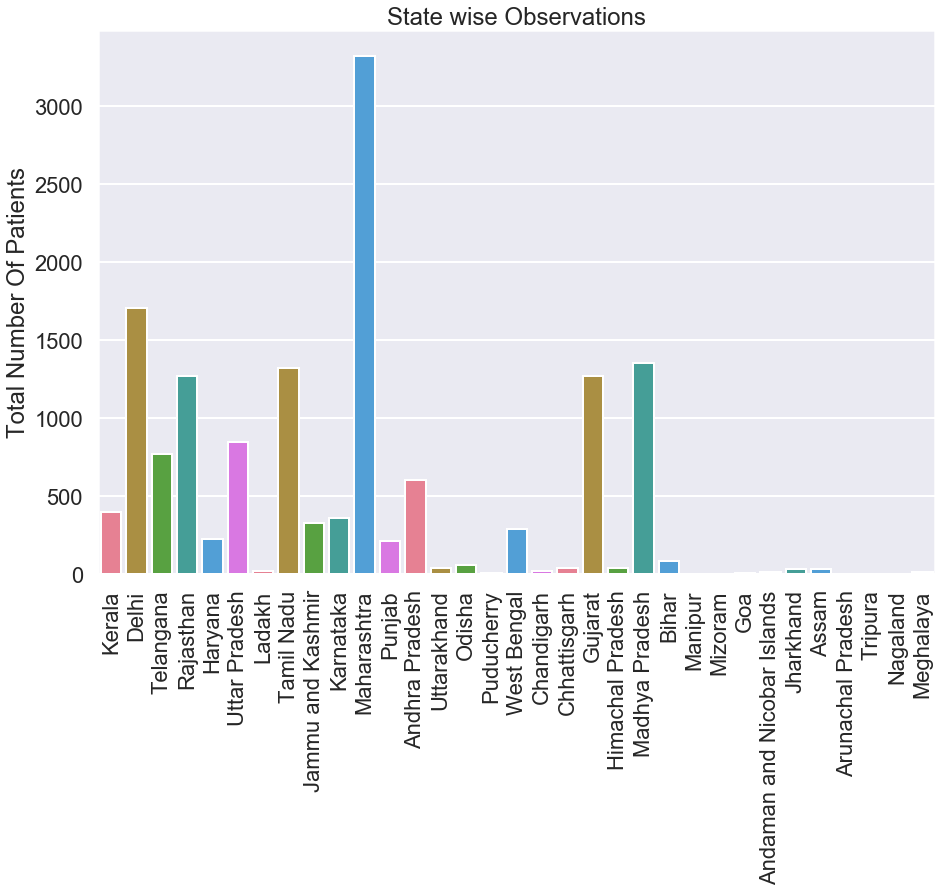

In [44]:
sns.set_context("poster")
color = sns.color_palette("husl")
plt.figure(figsize=(15,10))
g3 = sns.countplot(patients_2.detected_state, palette=color)
g3.set(ylabel = "Total Number Of Patients",xlabel="", title = "State wise Observations")

plt.xticks(rotation = 90)
plt.show()

In [45]:
patients_2["detected_state"].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya'],
      dtype=object)

### Plotting CountPlot on 15 states with maximum cases

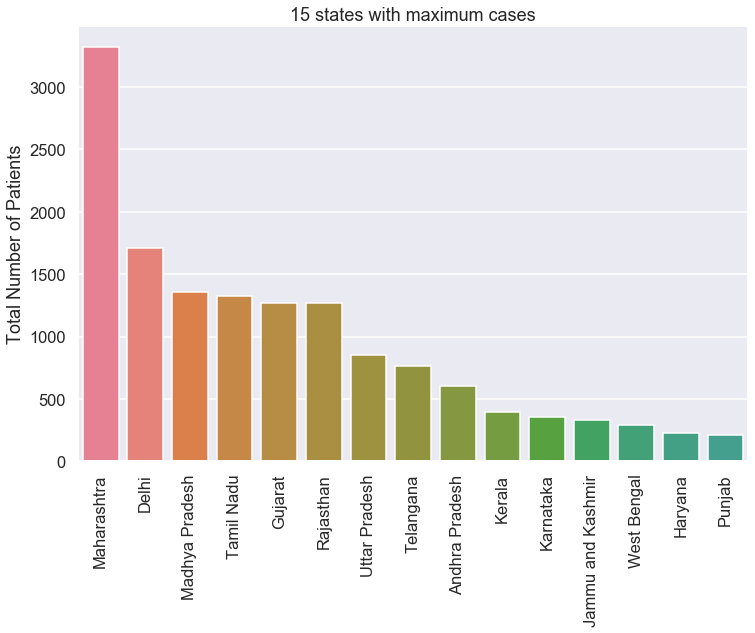

In [46]:
top_15_ = patients_2['detected_state'].value_counts()[0:15]

sns.set_context("talk")
plt.figure(figsize=(12,8))
g4 = sns.barplot(top_15_.index,top_15_, palette = sns.color_palette("husl",30))
g4.set(ylabel="Total Number of Patients", title = "15 states with maximum cases")
plt.xticks(rotation = 90)
plt.show()

### Plotting pie chart on top 15 states 

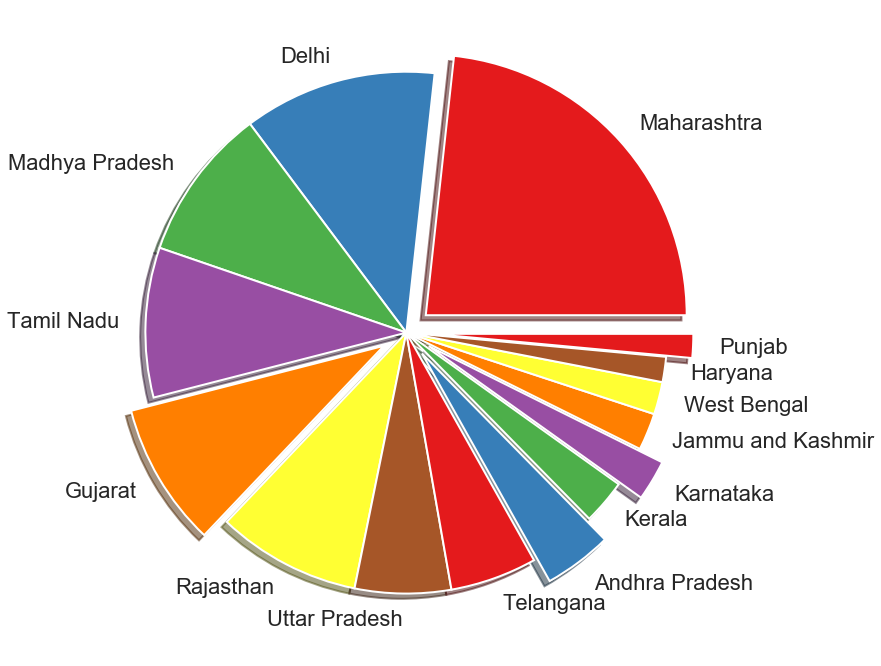

In [47]:
sns.set_palette(sns.color_palette("Set1", 7))
sns.set_context("poster")
plt.figure(figsize=(12,12))
explode = (0.1, 0, 0,0, 0.1, 0, 0,0, 0.1, 0,0.1, 0, 0,0, 0.1)
plt.pie(top_15_, explode = explode, labels = top_15_.index, shadow = True)
plt.show()

### Plotting Stacked Bar Chart for Age Groups on top 10 states

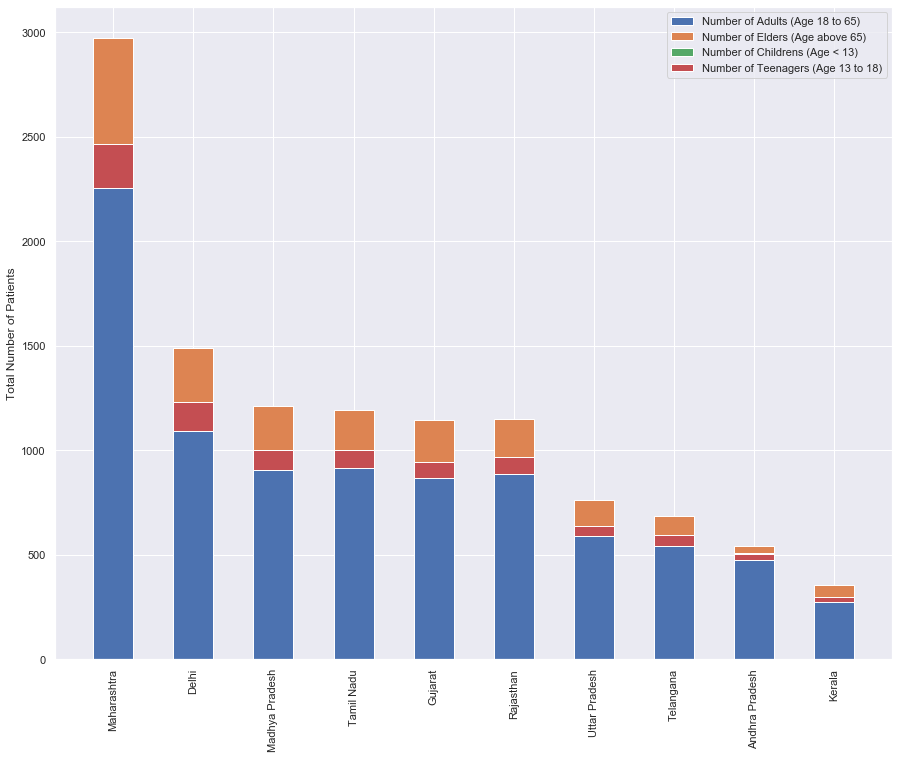

In [48]:
top_10 = patients_2['detected_state'].value_counts()[0:10]
no_of_adults = []
no_of_elderly = []
no_of_teens = []
no_of_childrens = []
for state in top_10.index:
    adults = patients_2[(patients_2['age_group'] == 'Adults') & (patients_2['detected_state'] == state)].shape[0]  
    elderly = patients_2[(patients_2['age_group'] == 'Elderly') & (patients_2['detected_state'] == state)].shape[0]
    teens = patients_2[(patients_2['age_group'] == 'Teens') & (patients_2['detected_state'] == state)].shape[0]
    childrens = patients_2[(patients_2['age_group'] == 'Children') & (patients_2['detected_state'] == state)].shape[0]
    no_of_adults.append(adults)
    no_of_elderly.append(elderly)
    no_of_teens.append(teens)
    no_of_childrens.append(childrens)

    
sns.set()    
width = 0.5      # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(15,12))

ax.bar(top_10.index, no_of_adults, width,label='Number of Adults (Age 18 to 65)')
ax.bar(top_10.index, no_of_elderly, width,bottom=no_of_adults,label='Number of Elders (Age above 65)')
ax.bar(top_10.index, no_of_childrens, width, bottom=no_of_adults,label='Number of Childrens (Age < 13)')
ax.bar(top_10.index, no_of_teens, width, bottom=no_of_adults,label='Number of Teenagers (Age 13 to 18)')

ax.set_ylabel('Total Number of Patients')
ax.set_title('')
plt.xticks(rotation = 90)
ax.legend()

plt.show()

In [49]:
print("Total Number of Adults top 10 state wise:" ,no_of_adults)
print("Total Number of Elderlys top 10 state wise:" ,no_of_elderly)
print("Total Number of Teens top 10 state wise:" ,no_of_teens)
print("Total Number of Childrens top 10 state wise:" ,no_of_childrens)

Total Number of Adults top 10 state wise: [2253, 1094, 905, 916, 866, 884, 590, 542, 475, 275]
Total Number of Elderlys top 10 state wise: [721, 396, 305, 278, 278, 265, 172, 141, 66, 78]
Total Number of Teens top 10 state wise: [213, 135, 97, 84, 79, 82, 48, 51, 28, 21]
Total Number of Childrens top 10 state wise: [133, 82, 48, 45, 49, 39, 39, 32, 34, 21]


# ---------------------------------Ends Here---------------------------------